In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math


In [4]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import pandas_datareader as web



ModuleNotFoundError: No module named 'pandas_datareader'

In [5]:
df = pd.read_csv('Data/NIFTY_2020.csv')
df.head()


,Instrument,Date,Time,Open,High,Low,Close
0,NIFTY,20200101,09:08,12202.15,12202.15,12202.15,12202.15
1,NIFTY,20200101,09:16,12204.45,12216.25,12201.55,12215.10
2,NIFTY,20200101,09:17,12215.45,12216.45,12205.70,12206.80
3,NIFTY,20200101,09:18,12206.50,12207.40,12202.70,12202.70
4,NIFTY,20200101,09:19,12203.55,12208.40,12201.20,12207.85


In [6]:

mf = pd.read_csv('Data/NIFTY_2020.csv')
mf.head()

,Instrument,Date,Time,Open,High,Low,Close
0,NIFTY,20200101,09:08,12202.15,12202.15,12202.15,12202.15
1,NIFTY,20200101,09:16,12204.45,12216.25,12201.55,12215.10
2,NIFTY,20200101,09:17,12215.45,12216.45,12205.70,12206.80
3,NIFTY,20200101,09:18,12206.50,12207.40,12202.70,12202.70
4,NIFTY,20200101,09:19,12203.55,12208.40,12201.20,12207.85


In [7]:
af = pd.read_csv('Data/TATAMOTORS_BSE_01Oct20-01Oct21.csv')
af.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-01,135.699997,136.500000,132.600006,133.500000,133.500000,1674311.0
1,2020-10-05,137.000000,137.500000,132.050003,133.899994,133.899994,2800303.0
2,2020-10-06,137.800003,145.699997,135.899994,144.850006,144.850006,10190922.0
3,2020-10-07,144.100006,144.500000,139.800003,141.000000,141.000000,4032654.0
4,2020-10-08,142.800003,143.350006,139.649994,140.899994,140.899994,2491175.0



## Perform EDA

In [7]:
df.isnull().sum()


Instrument    0
Date          0
Time          0
Open          0
High          0
Low           0
Close         0
dtype: int64

In [8]:
mf.isnull().sum()

Instrument    0
Date          0
Time          0
Open          0
High          0
Low           0
Close         0
dtype: int64

In [9]:
af.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [17]:
df.shape


(94884, 7)

In [16]:
mf.shape


(94884, 7)

In [15]:
af.shape

(248, 7)

In [18]:
df.corr

<bound method DataFrame.corr of       Instrument      Date   Time      Open      High       Low     Close
0          NIFTY  20200101  09:08  12202.15  12202.15  12202.15  12202.15
1          NIFTY  20200101  09:16  12204.45  12216.25  12201.55  12215.10
2          NIFTY  20200101  09:17  12215.45  12216.45  12205.70  12206.80
3          NIFTY  20200101  09:18  12206.50  12207.40  12202.70  12202.70
4          NIFTY  20200101  09:19  12203.55  12208.40  12201.20  12207.85
...          ...       ...    ...       ...       ...       ...       ...
94879      NIFTY  20201231  15:28  13977.90  13981.55  13977.90  13978.45
94880      NIFTY  20201231  15:29  13980.20  13980.45  13966.20  13967.40
94881      NIFTY  20201231  15:30  13968.65  13971.10  13965.20  13967.00
94882      NIFTY  20201231  15:31  13967.20  13967.20  13967.20  13967.20
94883      NIFTY  20201231  15:32  13981.75  13981.75  13981.75  13981.75

[94884 rows x 7 columns]>

In [19]:
mf.corr

<bound method DataFrame.corr of       Instrument      Date   Time      Open      High       Low     Close
0          NIFTY  20200101  09:08  12202.15  12202.15  12202.15  12202.15
1          NIFTY  20200101  09:16  12204.45  12216.25  12201.55  12215.10
2          NIFTY  20200101  09:17  12215.45  12216.45  12205.70  12206.80
3          NIFTY  20200101  09:18  12206.50  12207.40  12202.70  12202.70
4          NIFTY  20200101  09:19  12203.55  12208.40  12201.20  12207.85
...          ...       ...    ...       ...       ...       ...       ...
94879      NIFTY  20201231  15:28  13977.90  13981.55  13977.90  13978.45
94880      NIFTY  20201231  15:29  13980.20  13980.45  13966.20  13967.40
94881      NIFTY  20201231  15:30  13968.65  13971.10  13965.20  13967.00
94882      NIFTY  20201231  15:31  13967.20  13967.20  13967.20  13967.20
94883      NIFTY  20201231  15:32  13981.75  13981.75  13981.75  13981.75

[94884 rows x 7 columns]>

In [20]:
af.corr

<bound method DataFrame.corr of            Date        Open        High         Low       Close   Adj Close  \
0    2020-10-01  135.699997  136.500000  132.600006  133.500000  133.500000   
1    2020-10-05  137.000000  137.500000  132.050003  133.899994  133.899994   
2    2020-10-06  137.800003  145.699997  135.899994  144.850006  144.850006   
3    2020-10-07  144.100006  144.500000  139.800003  141.000000  141.000000   
4    2020-10-08  142.800003  143.350006  139.649994  140.899994  140.899994   
..          ...         ...         ...         ...         ...         ...   
243  2021-09-24  324.799988  327.000000  316.000000  317.950012  317.950012   
244  2021-09-27  322.299988  333.500000  322.299988  331.549988  331.549988   
245  2021-09-28  333.750000  336.000000  324.700012  329.250000  329.250000   
246  2021-09-29  325.500000  332.899994  324.000000  330.350006  330.350006   
247  2021-09-30  331.000000  337.850006  329.149994  333.200012  333.200012   

         Volume  
0

C:\Users\Hassan\AppData\Local\Temp\ipykernel_10536\1041616119.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() ,annot=True , cmap=plt.cm.Accent)


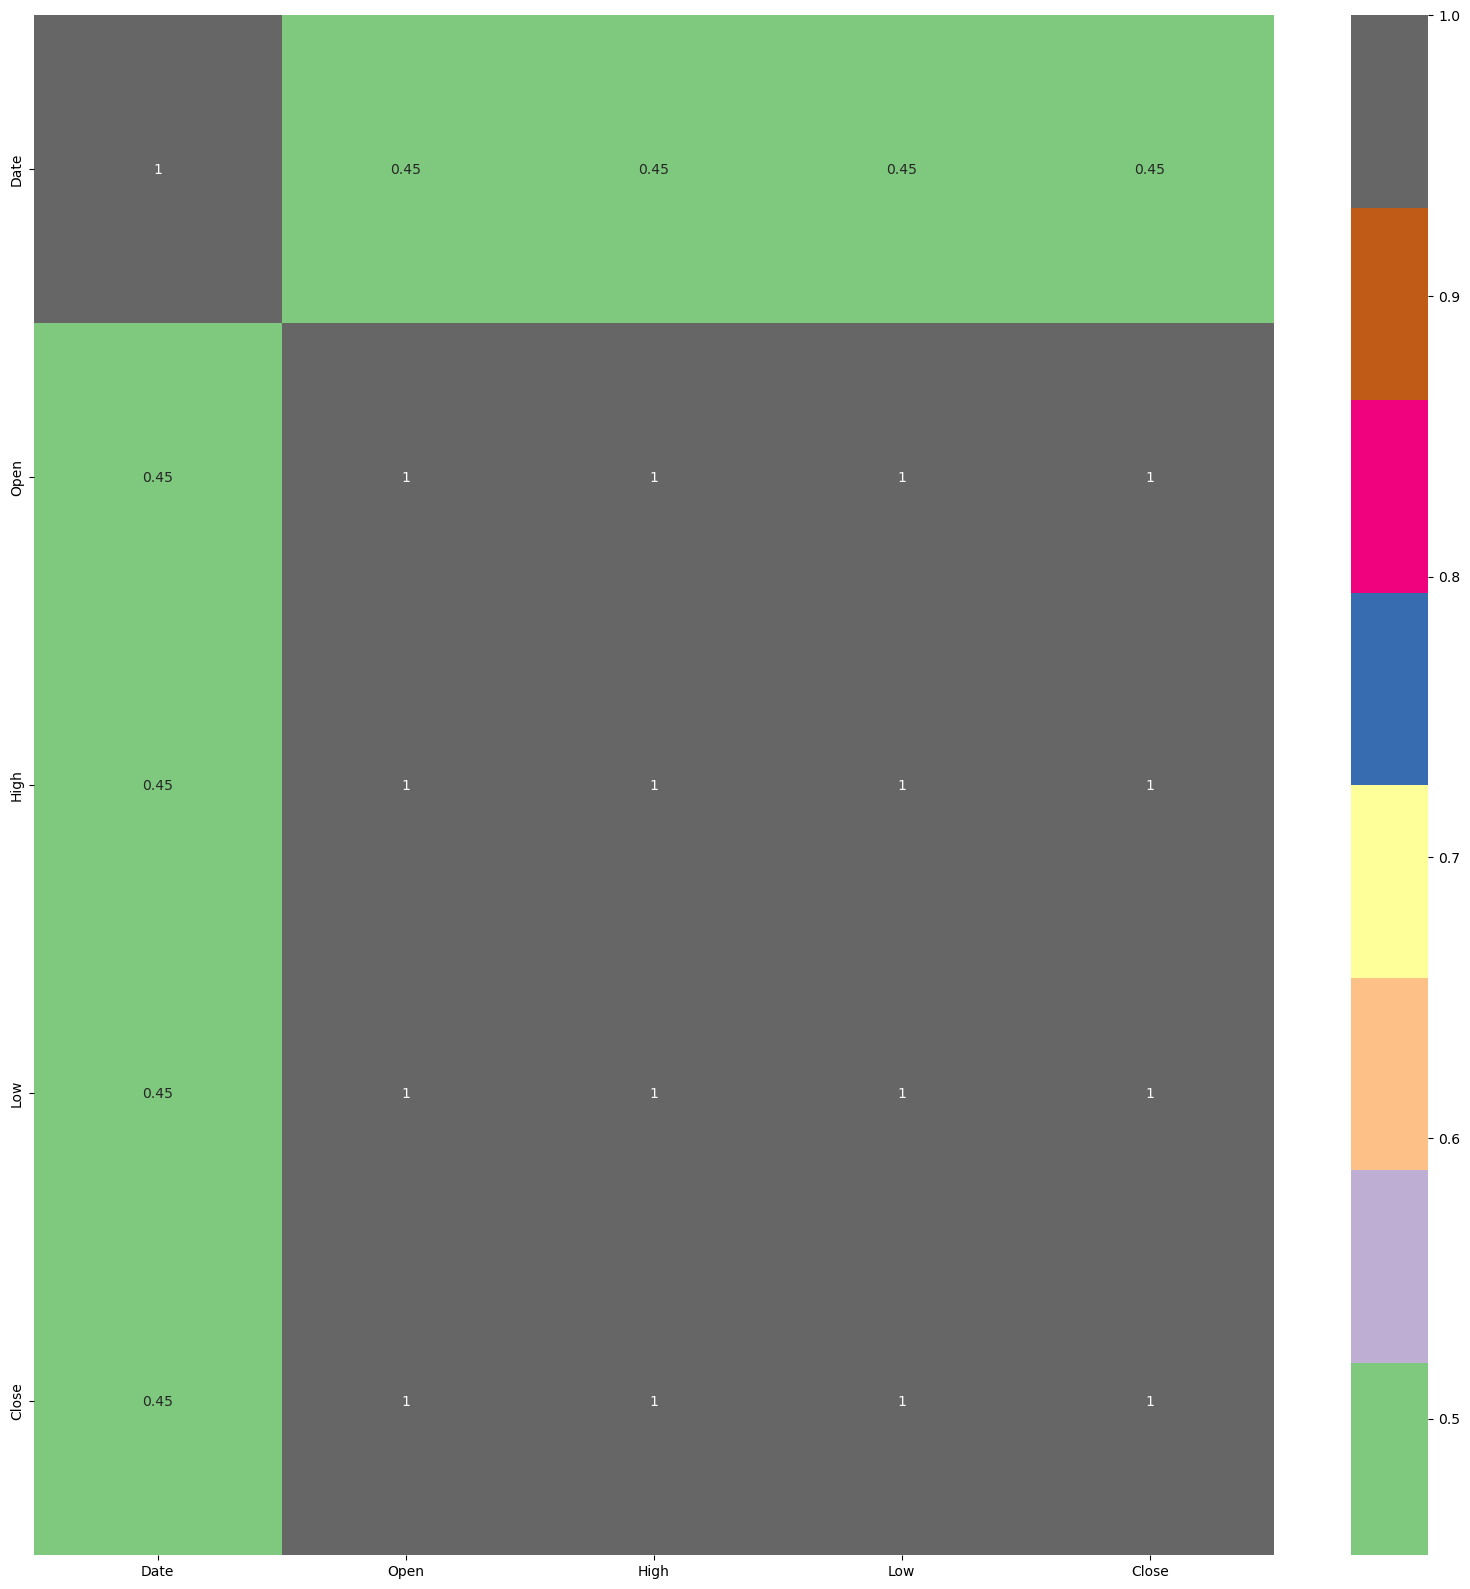

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr() ,annot=True , cmap=plt.cm.Accent)
plt.show()

C:\Users\Hassan\AppData\Local\Temp\ipykernel_10536\2441976747.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mf.corr() ,annot=True , cmap=plt.cm.Accent)


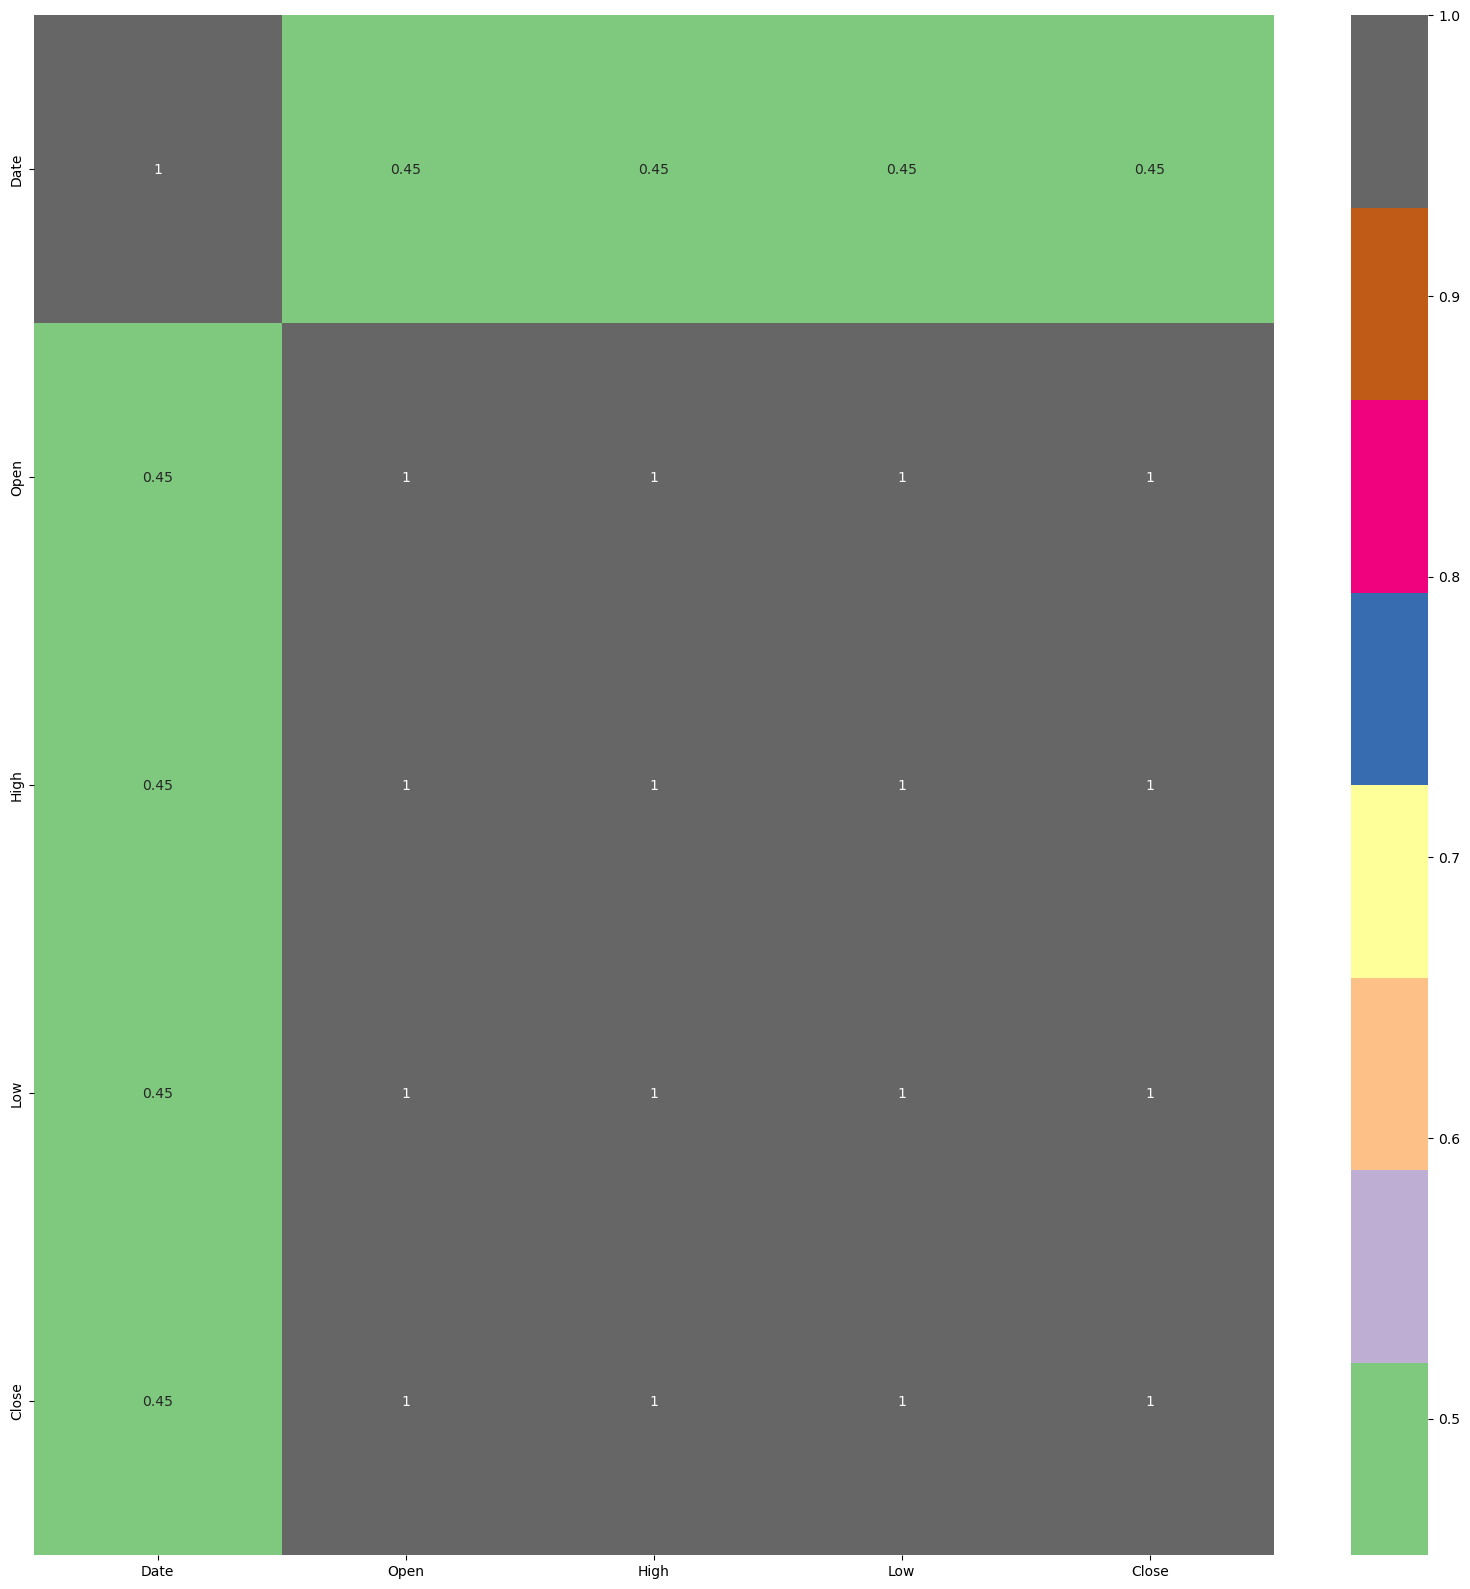

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(mf.corr() ,annot=True , cmap=plt.cm.Accent)
plt.show()

C:\Users\Hassan\AppData\Local\Temp\ipykernel_10536\986948921.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(af.corr() ,annot=True , cmap=plt.cm.Accent)


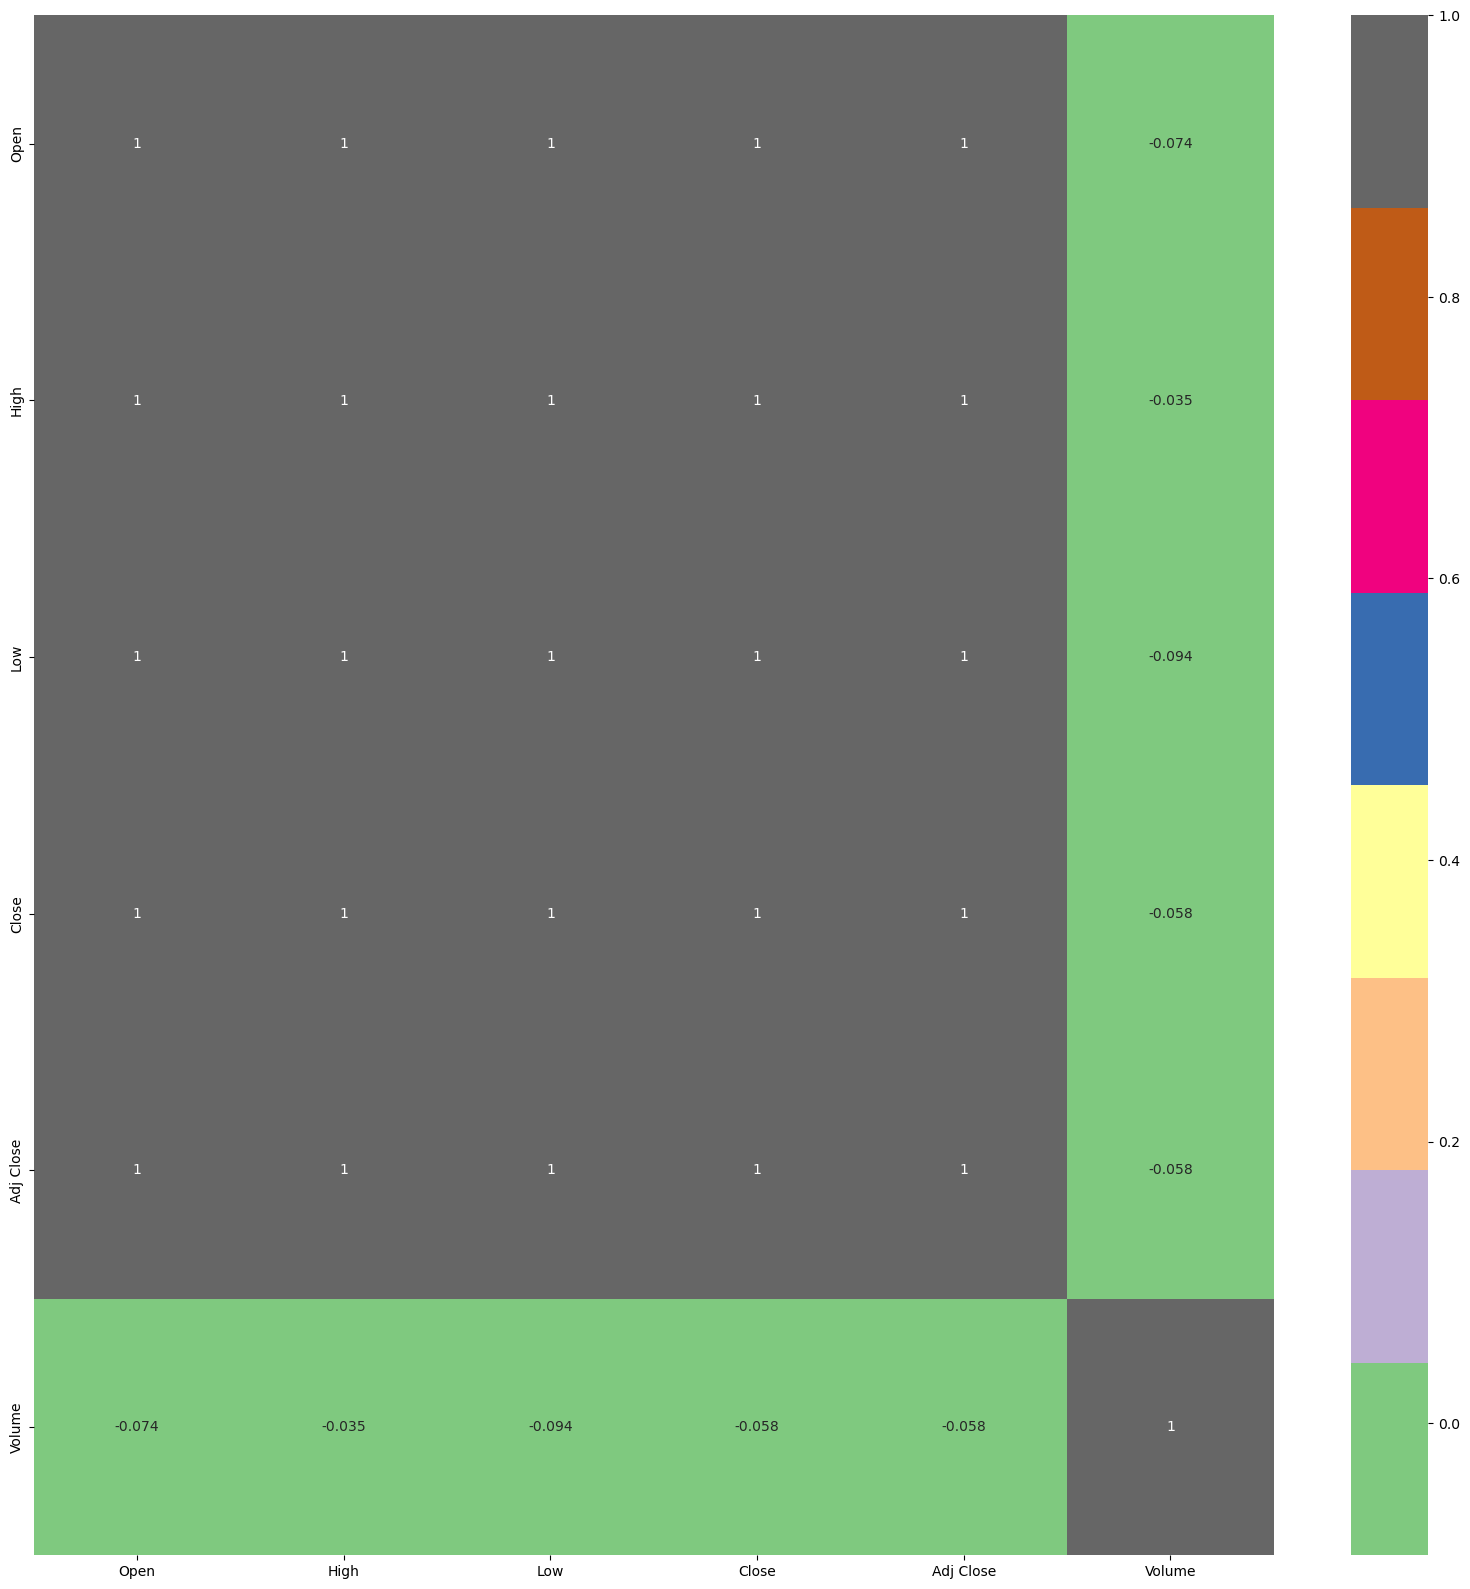

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(af.corr() ,annot=True , cmap=plt.cm.Accent)
plt.show()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>, <Axes: >]], dtype=object)

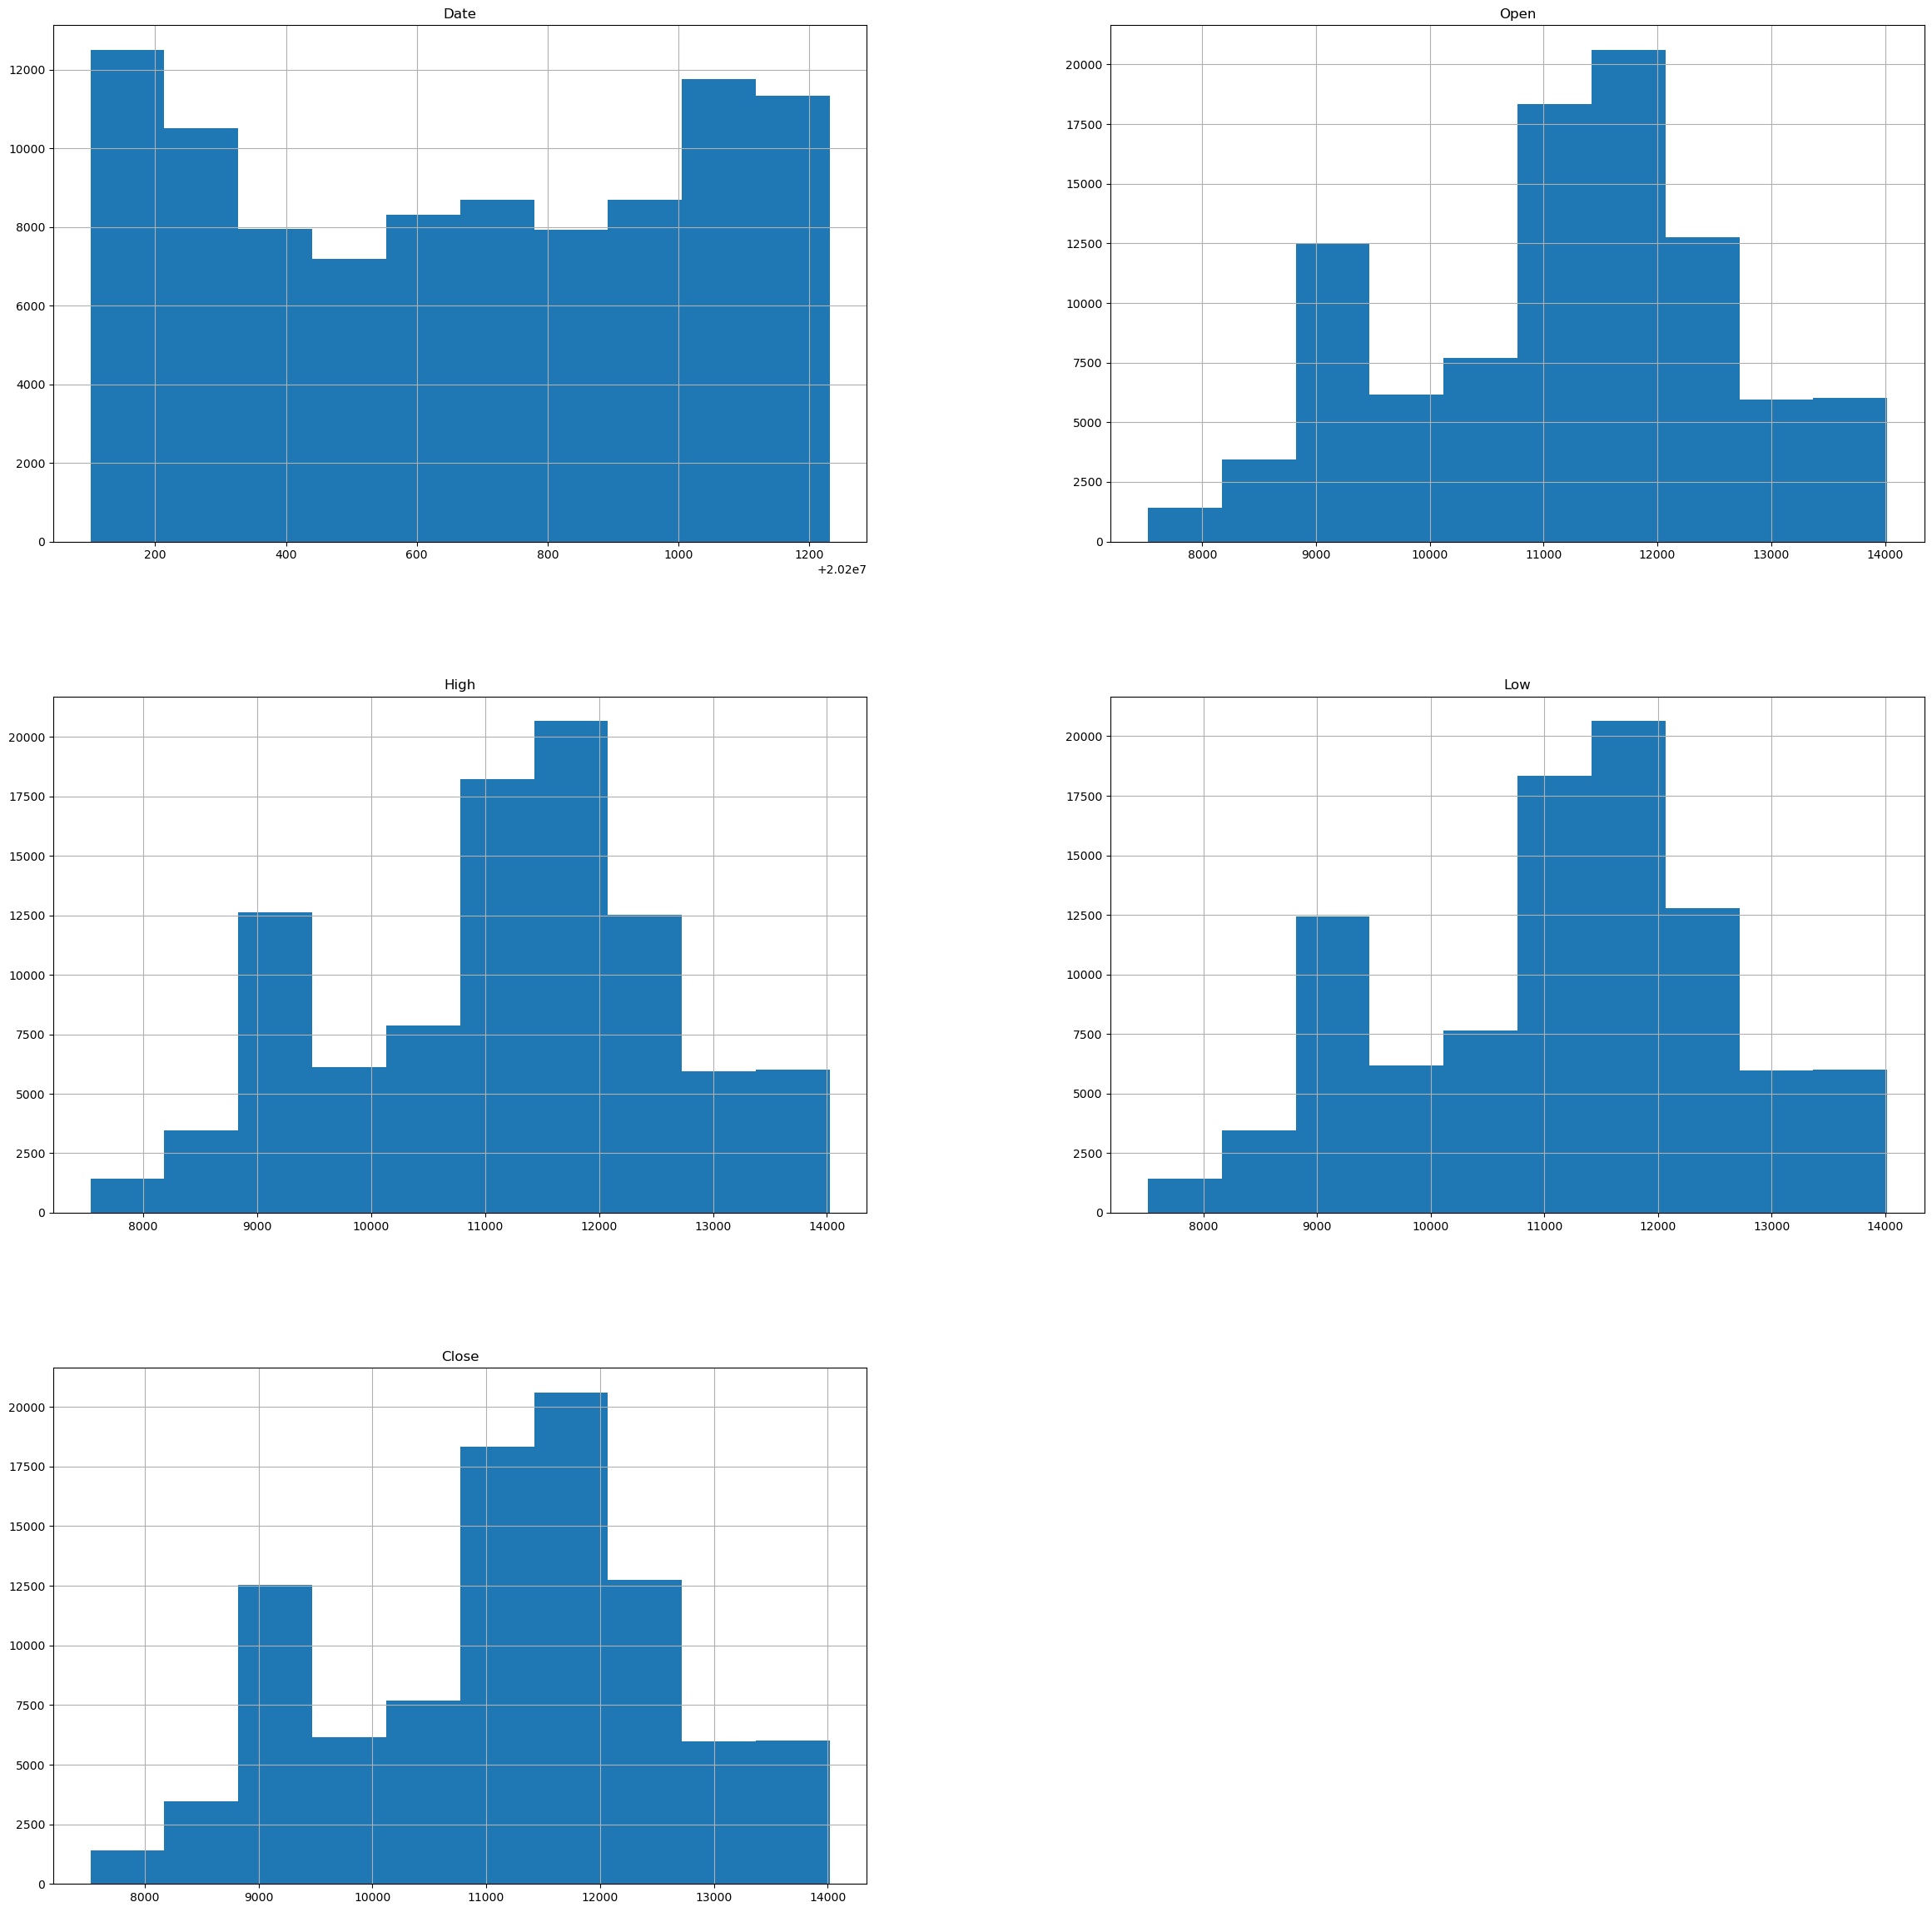

In [11]:
df.hist(figsize=(29,29))

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>],
       [<Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>, <Axes: >]], dtype=object)

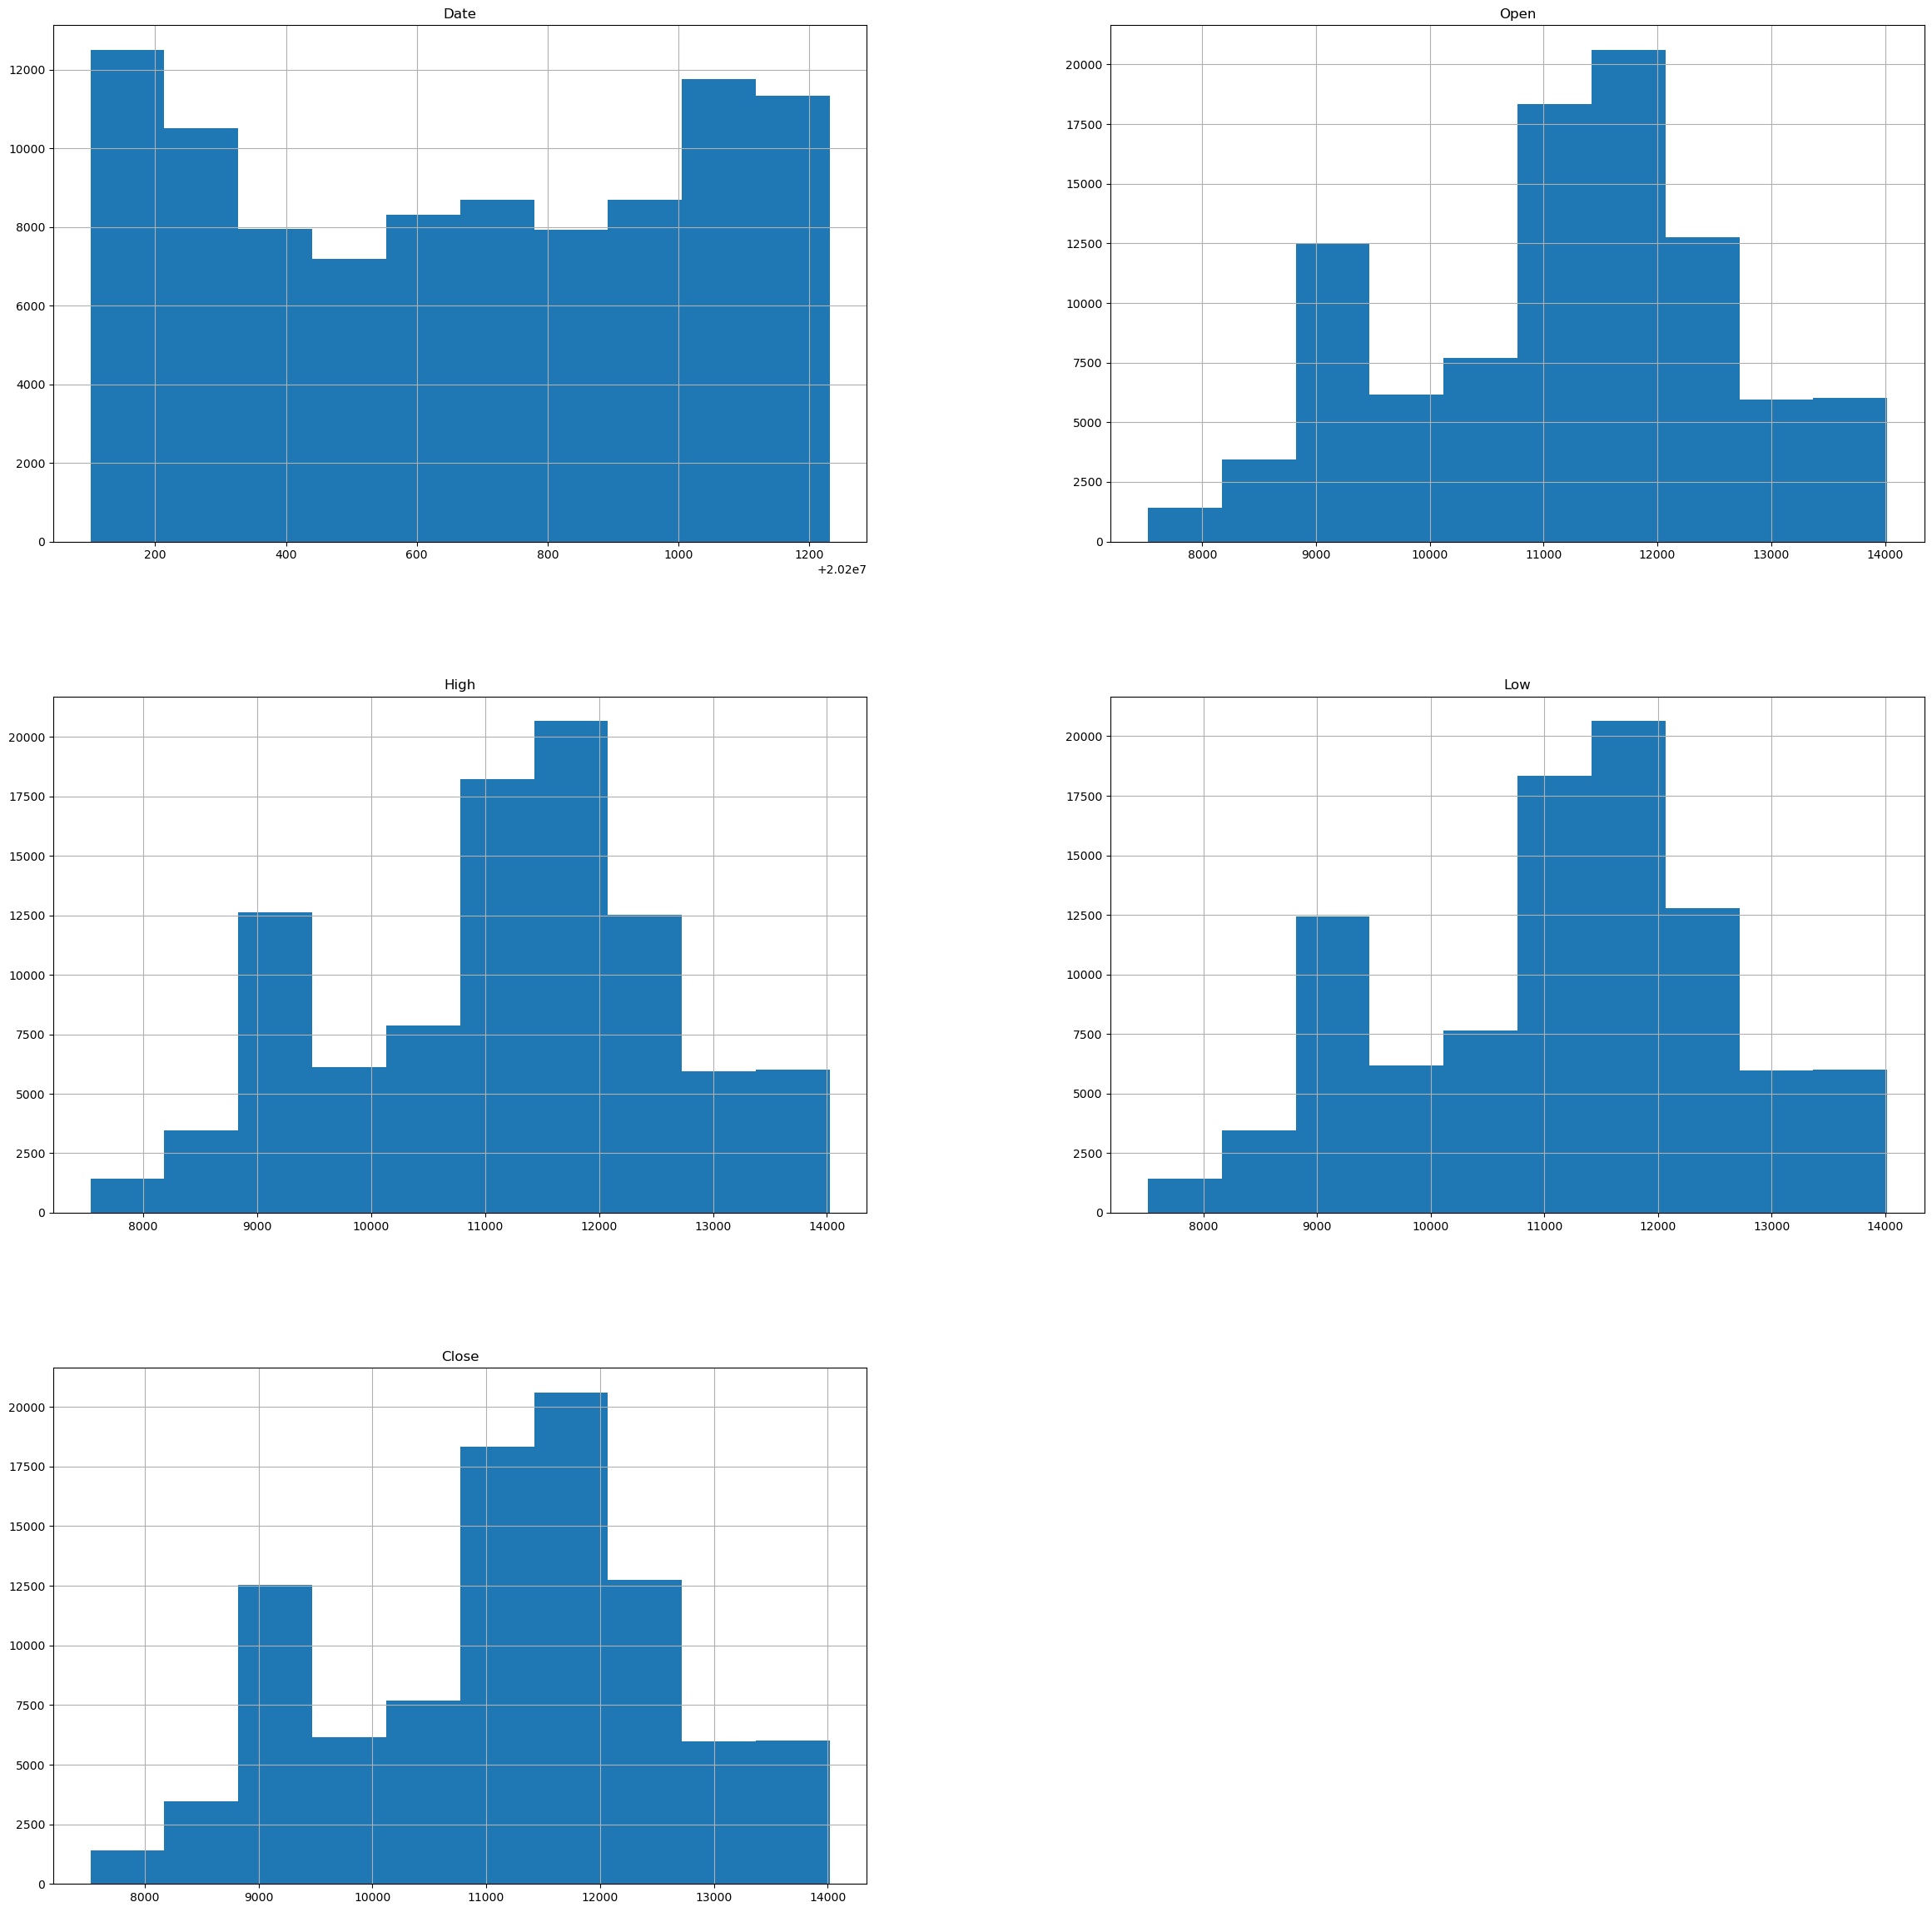

In [12]:
mf.hist(figsize=(29,29))

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

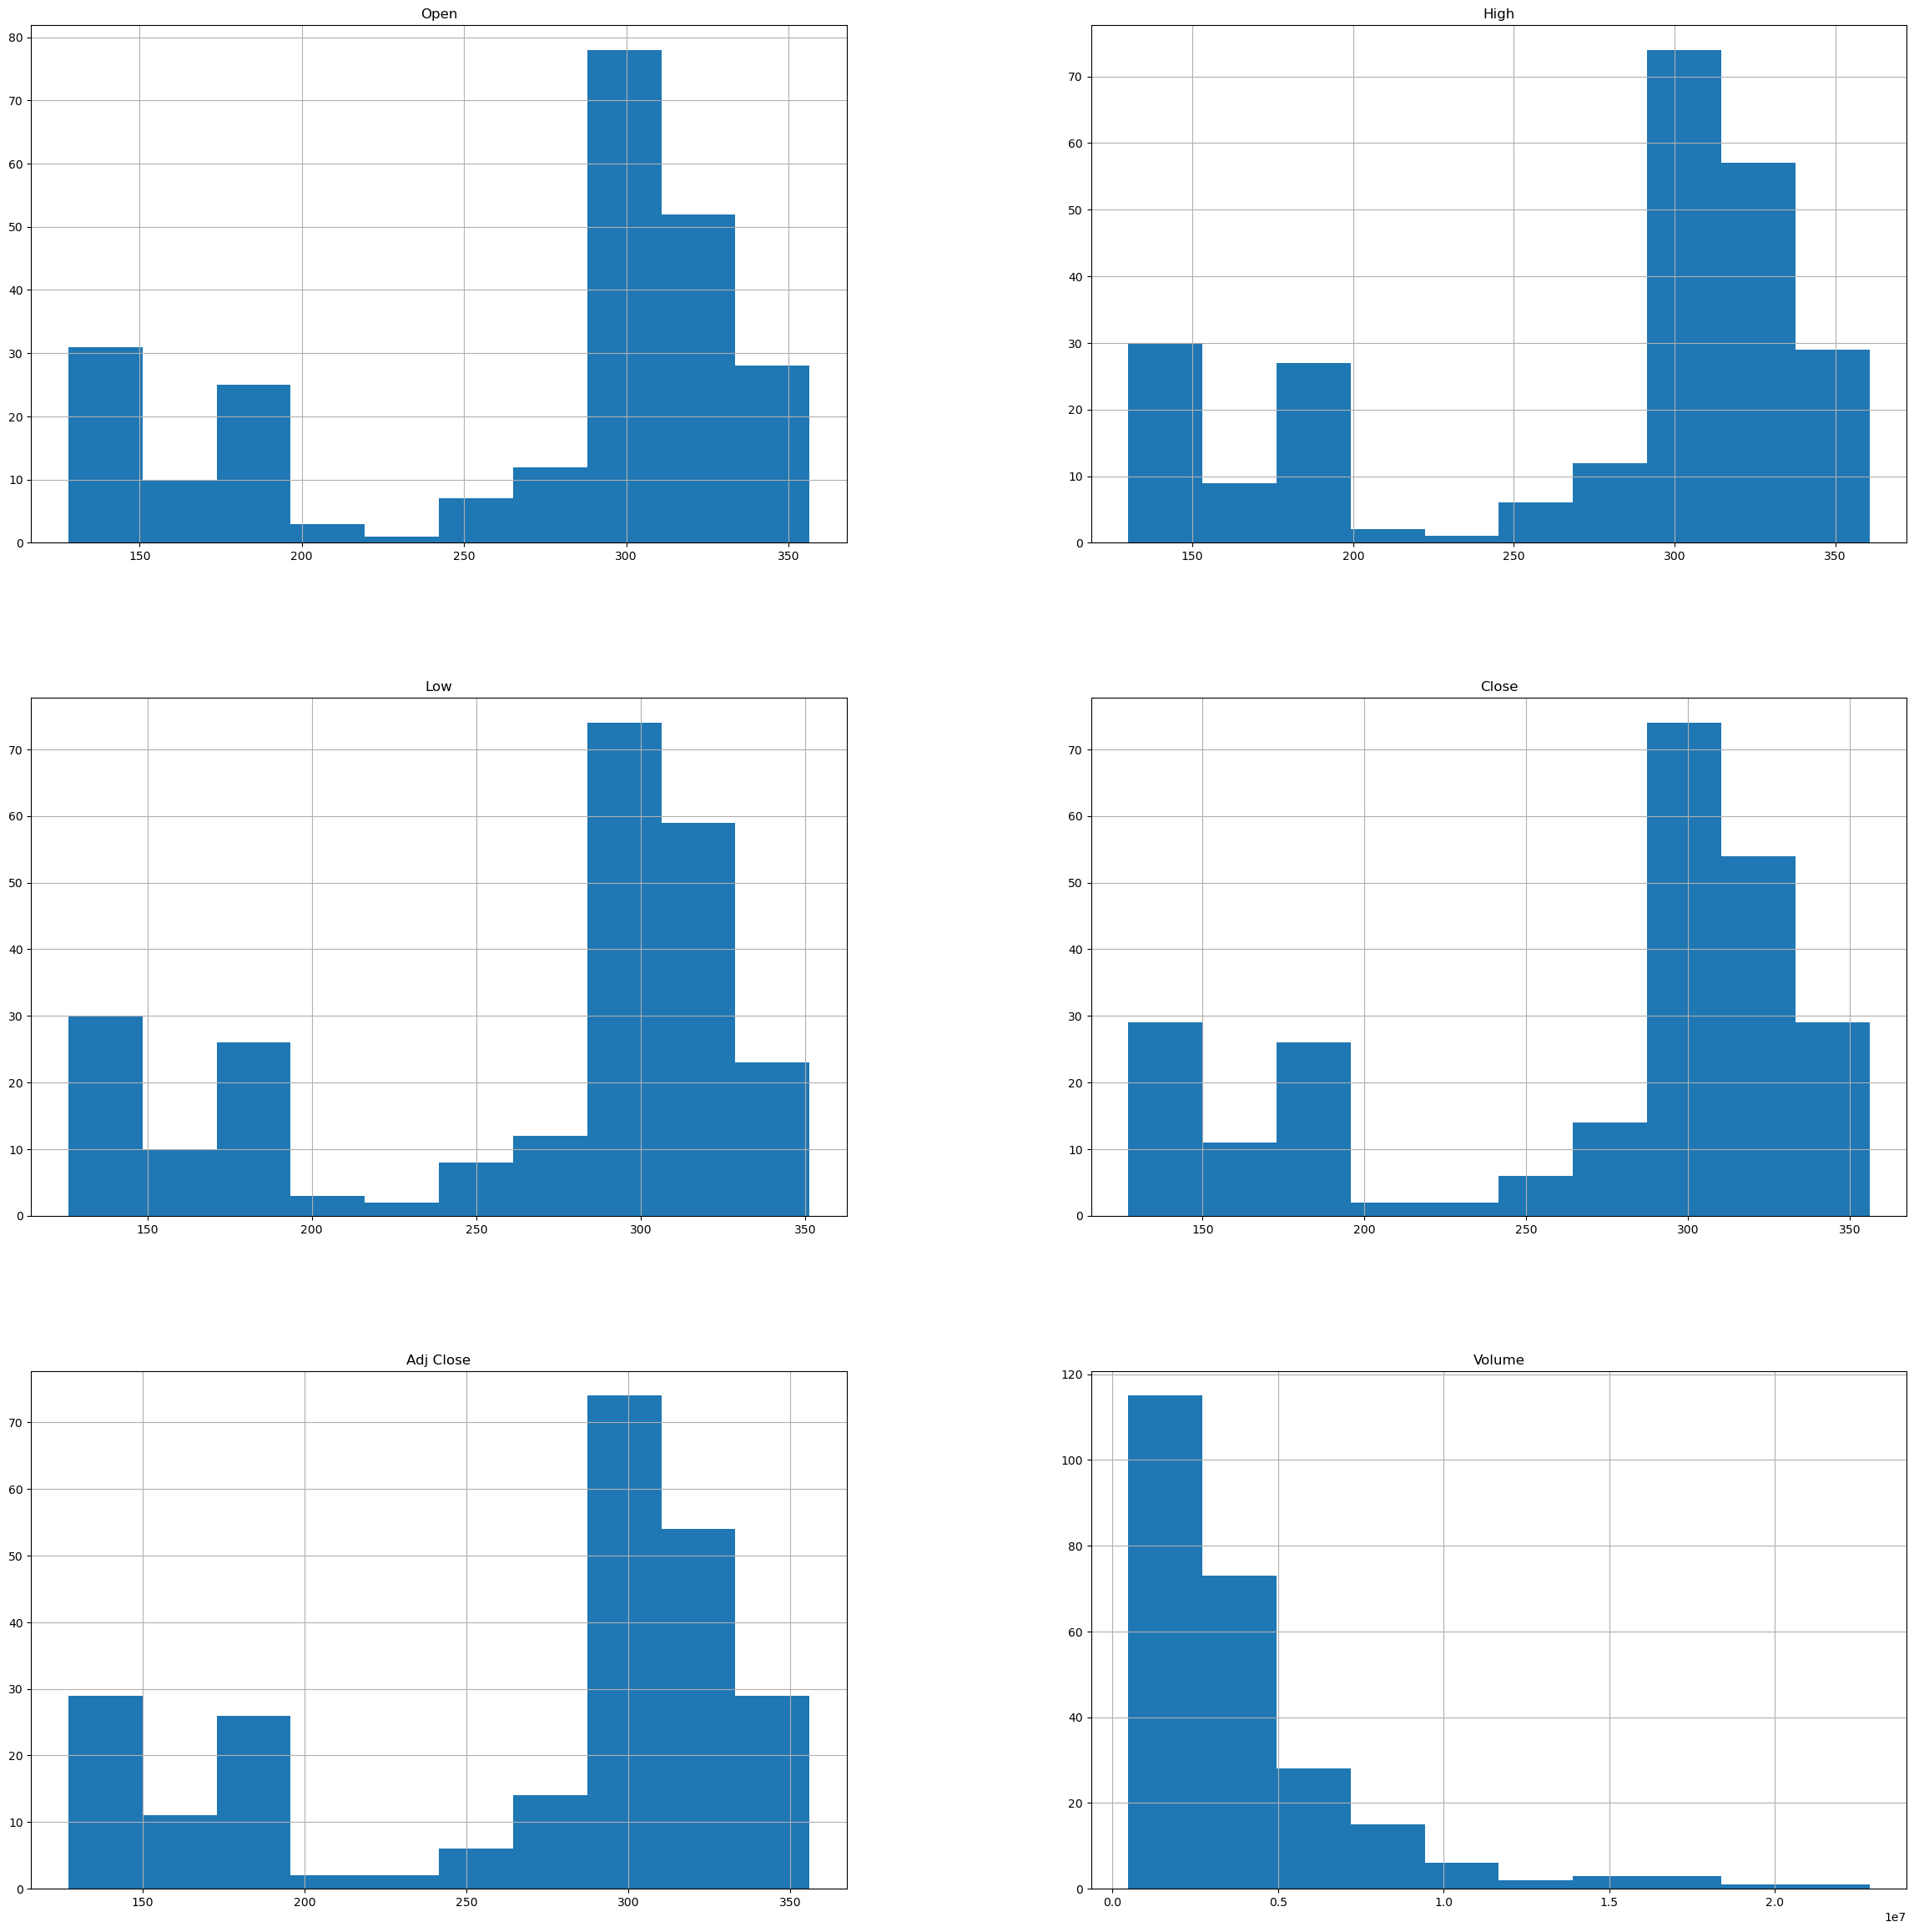

In [13]:
af.hist(figsize=(29,29))

In [9]:
df['HL_PCT']=(df['Adj_High']-df['Adj_Low'])/df['Adj_Close']*100.0
df['PCT_change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100.0

KeyError: 'Adj_High'

In [11]:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0


In [18]:
df.head()

,Instrument,Date,Time,Open,High,Low,Close,HL_PCT,PCT_change
0,NIFTY,20200101,09:08,12202.15,12202.15,12202.15,12202.15,0.000000,0.000000
1,NIFTY,20200101,09:16,12204.45,12216.25,12201.55,12215.10,0.120343,0.087263
2,NIFTY,20200101,09:17,12215.45,12216.45,12205.70,12206.80,0.088066,-0.070812
3,NIFTY,20200101,09:18,12206.50,12207.40,12202.70,12202.70,0.038516,-0.031131
4,NIFTY,20200101,09:19,12203.55,12208.40,12201.20,12207.85,0.058978,0.035236


In [28]:
df1 = df[['Close' ,'HL_PCT' , 'PCT_change' ]]

In [26]:
df1.head()

,Close,HL_PCT,PCT_change
0,12202.15,0.000000,0.000000
1,12215.10,0.120343,0.087263
2,12206.80,0.088066,-0.070812
3,12202.70,0.038516,-0.031131
4,12207.85,0.058978,0.035236


In [29]:
df1.isnull().sum()

Close         0
HL_PCT        0
PCT_change    0
dtype: int64

##  Divide data into dependent and independent features

In [33]:
X = df1.drop('Close',axis=1)
y = df1['Close']

In [34]:
X.head()

,HL_PCT,PCT_change
0,0.000000,0.000000
1,0.120343,0.087263
2,0.088066,-0.070812
3,0.038516,-0.031131
4,0.058978,0.035236


In [35]:
y.head()

0    12202.15
1    12215.10
2    12206.80
3    12202.70
4    12207.85
Name: Close, dtype: float64

## Split data into train and test

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=51)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

In [39]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=51)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((75907, 2), (75907,), (18977, 2), (18977,))

## Apply Normalization and train the model using LinearRegression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)


In [43]:
X_test = sc.transform(X_test)


C:\Users\Hassan\Desktop\ap1\stock-price-prediction\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler



lr = LinearRegression()



In [50]:
lr.fit(X_train,y_train)

LinearRegression()

## Test the model with test data and evaluate the model

In [53]:
# line=lr.coef_*X_train+lr.intercept_
pred = lr.predict(X_test)


In [52]:
pred

array([17264.39280443, 14577.64861283, 14708.76876395, ...,
       16356.18365746, 10850.44524369, 11592.26390652])

In [54]:
y_test

79927    11822.45
32379     9192.20
69045    11226.45
29718     9337.25
83259    12804.95
           ...   
26534     9219.95
93610    13863.90
57892    11269.90
50591    10682.05
39681    10125.95
Name: Close, Length: 18977, dtype: float64

In [55]:
frame = pd.DataFrame({"Actual" : y_test , "Predicted" : pred})
frame

,Actual,Predicted
79927,11822.45,17264.392804
32379,9192.20,14577.648613
69045,11226.45,14708.768764
29718,9337.25,13919.454970
83259,12804.95,13413.142410
...,...,...
26534,9219.95,2253.536752
93610,13863.90,17624.839886
57892,11269.90,16356.183657
50591,10682.05,10850.445244


In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [57]:
print("Mean Absoulte Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",math.sqrt(mean_squared_error(y_test,pred)))

Mean Absoulte Error: 4540.88743472915
Mean Squared Error: 75388103.31901428
Root Mean Squared Error: 8682.632280536489


## Thank You !!!!!!!!!!